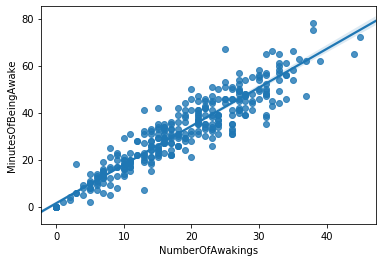

In [3]:
import seaborn as sns
%matplotlib inline
import pandas as pd
data = pd.read_csv('Fitbit2.csv') 
data.head(20)

data[['NumberOfAwakings', 'MinutesOfBeingAwake']].head(20)
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)


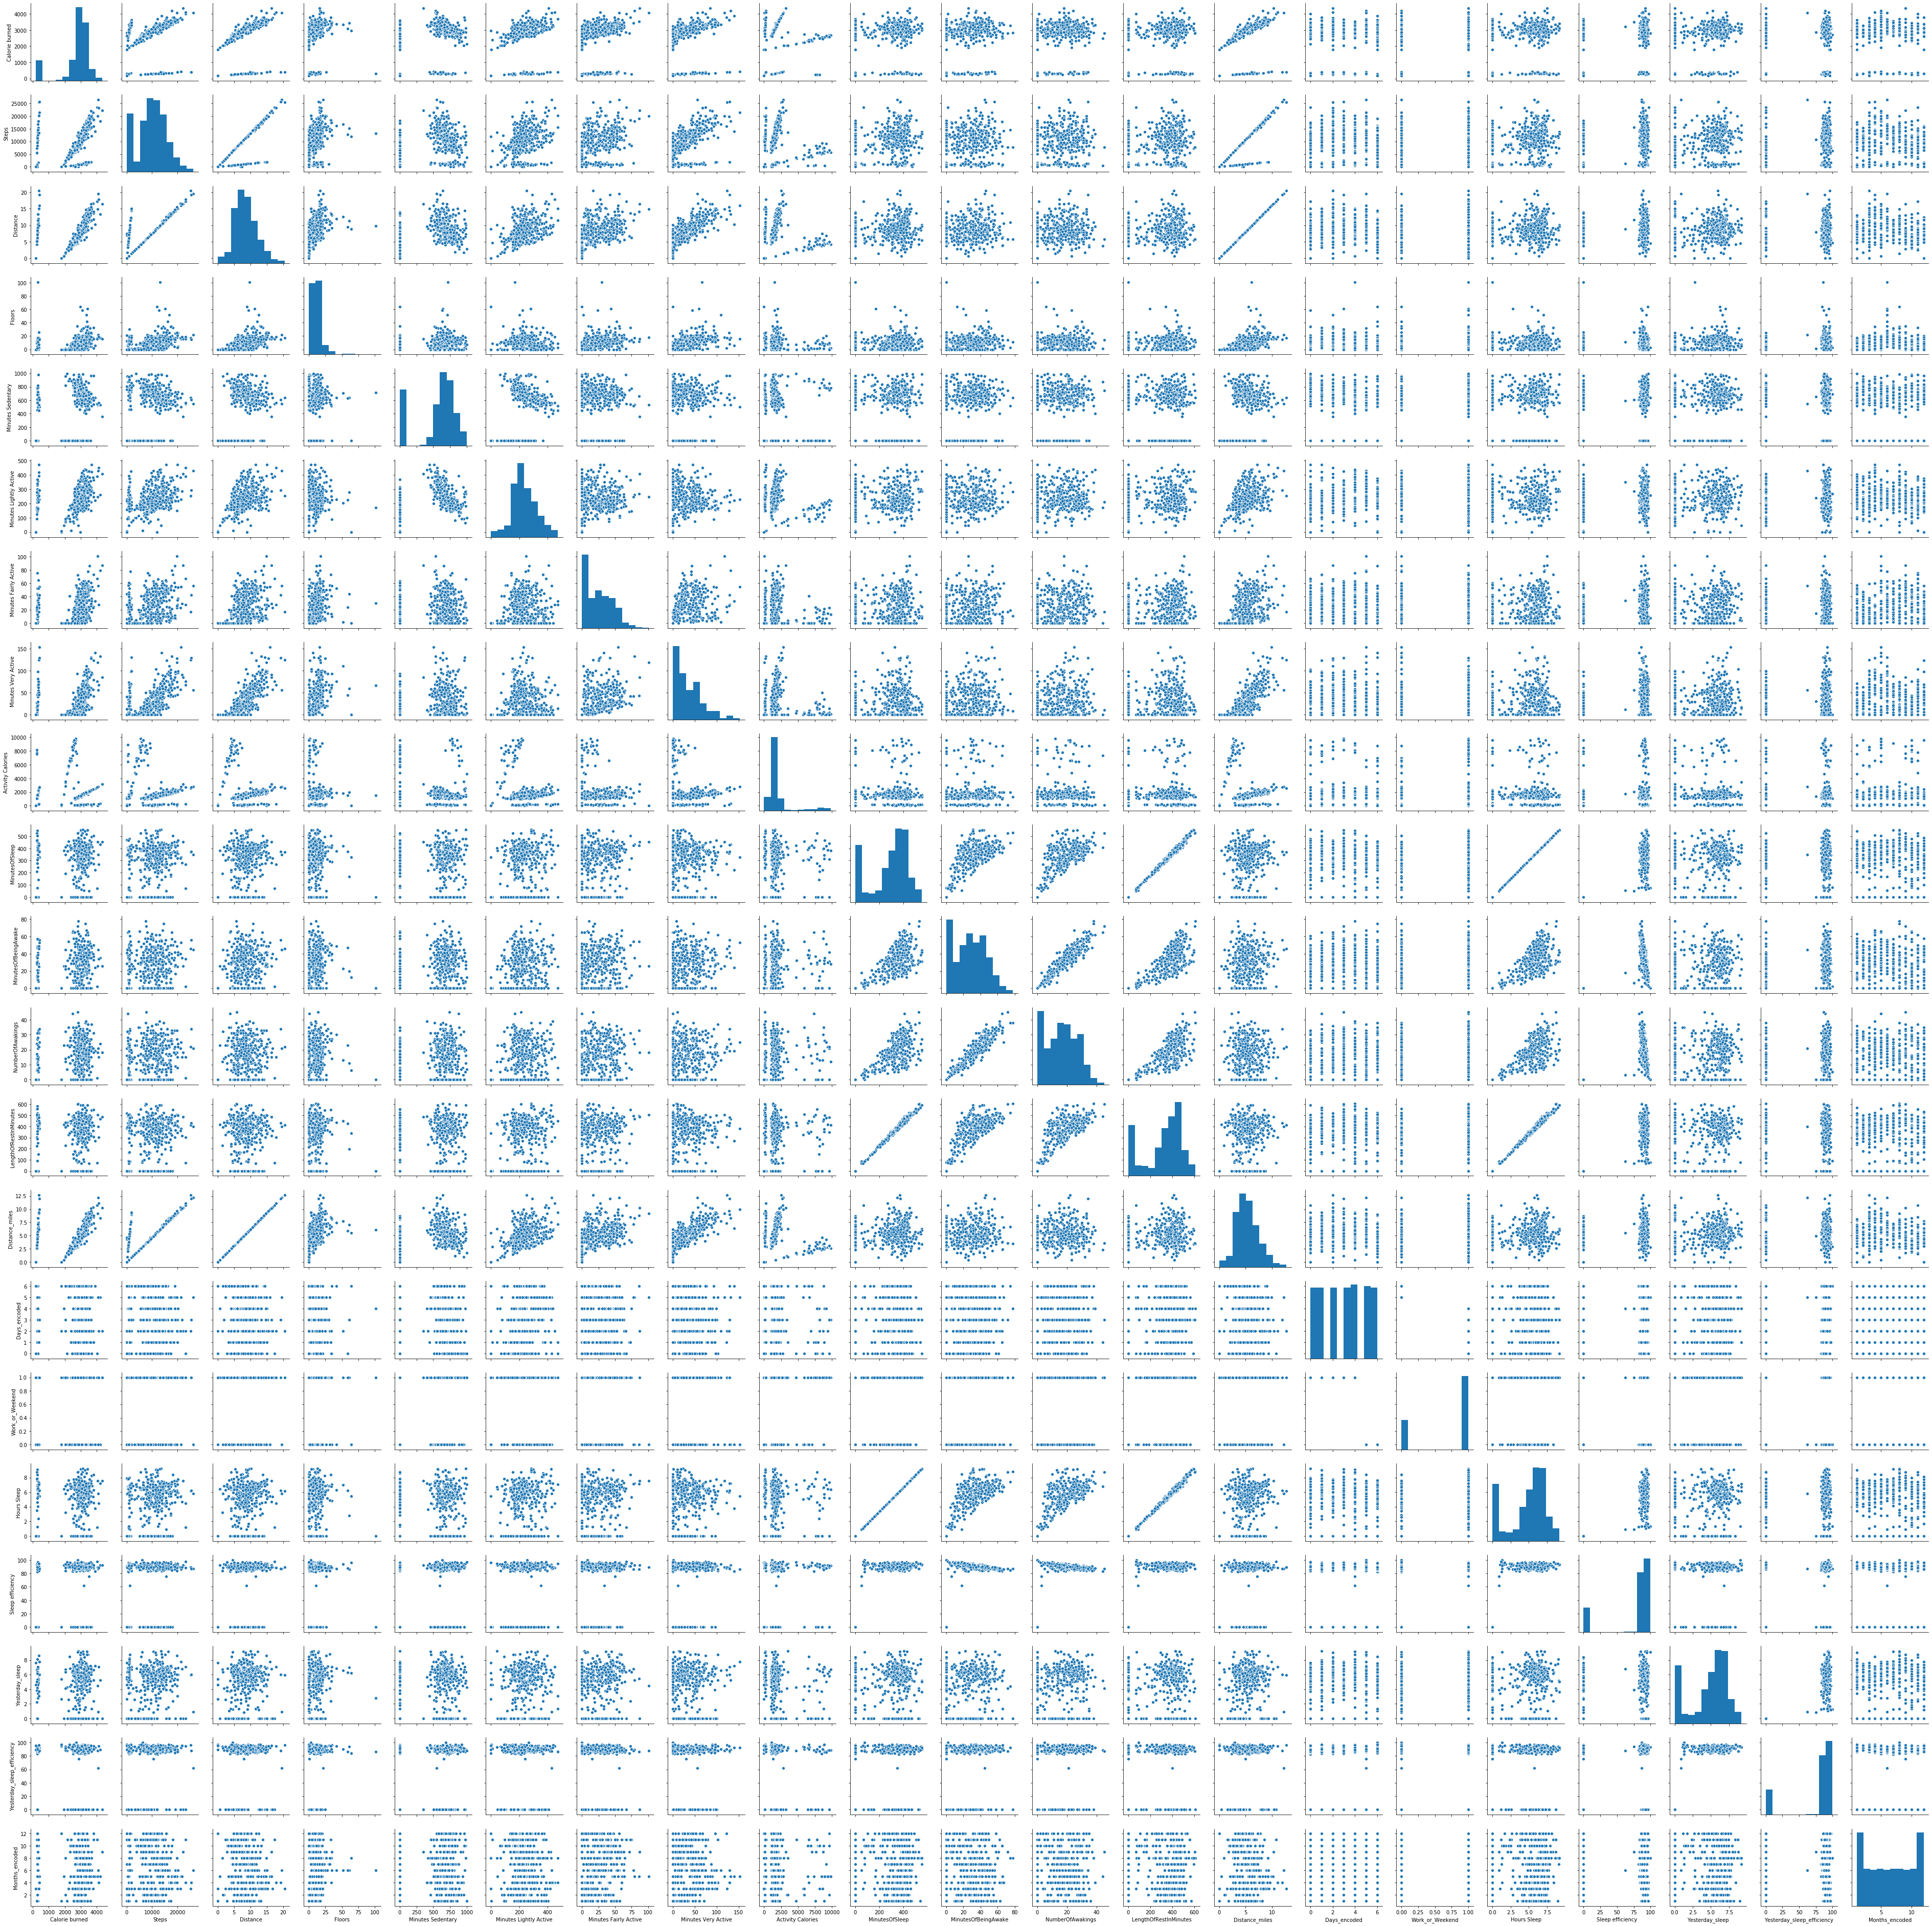

In [8]:
import seaborn as sns

#sns.pairplot(data[['NumberOfAwakings', 'MinutesOfBeingAwake', 'Minutes Lightly Active']])
#data[['NumberOfAwakings', 'MinutesOfBeingAwake', 'Minutes Lightly Active']].corr()
sns.pairplot(data)

In [ ]:
data[['NumberOfAwakings','MinutesOfBeingAwake']]

In [7]:
data['NumberOfAwakings'].corr(data['MinutesOfBeingAwake'])

0.9518168284473625

In [9]:
from scipy import stats
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
# alternative: 
# results = stats.linregress(X, Y)
# slope = results[0]
# intercept = results[1]
# etc.
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))


The slope is: 1.6405141436199793
The intercept is: 1.4381033523783202


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [12]:
#model.fit(data['NumberOfAwakings'], data['MinutesOfBeingAwake'])
model.fit(data['NumberOfAwakings'].values.reshape(-1,1), data['MinutesOfBeingAwake'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
intercept = model.intercept_
slope = model.coef_
print(intercept)
print(slope)

[1.43810335]
[[1.64051414]]


In [14]:
intercept = intercept[0]
slope = slope[0][0]
print(intercept)
print(slope)

1.4381033523783096
1.64051414361998


In [15]:
predictions = [intercept + slope*x for x in data['NumberOfAwakings']]
predictions

[39.16992865563785,
 35.888900368397884,
 42.45095694287781,
 35.888900368397884,
 73.62072567165742,
 52.29404180459768,
 21.12427307581807,
 27.68632965029799,
 30.967357937537948,
 19.48375893219809,
 14.562216501338149,
 45.73198523011777,
 37.529414512017865,
 44.09147108649779,
 44.09147108649779,
 40.81044279925783,
 32.60787208115793,
 1.4381033523783096,
 47.37249937373775,
 29.32684379391797,
 53.934555948217664,
 44.09147108649779,
 42.45095694287781,
 55.575070091837645,
 44.09147108649779,
 57.21558423545763,
 49.013013517357734,
 26.045815506678007,
 57.21558423545763,
 45.73198523011777,
 32.60787208115793,
 50.6535276609777,
 42.45095694287781,
 24.40530136305803,
 50.6535276609777,
 6.35964578323825,
 35.888900368397884,
 24.40530136305803,
 24.40530136305803,
 29.32684379391797,
 22.76478721943805,
 19.48375893219809,
 1.4381033523783096,
 16.20273064495813,
 50.6535276609777,
 39.16992865563785,
 44.09147108649779,
 37.529414512017865,
 49.013013517357734,
 40.810442

In [17]:
#residuals = [data['MinutesOfBeingAwake'][i] - predictions[i] for i in range(len(data['MinutesOfBeingAwake']))]
residuals = [realvalue - predictedvalue for realvalue, predictedvalue in zip(data['MinutesOfBeingAwake'],predictions)]
residuals

[-13.169928655637847,
 -0.8889003683978842,
 3.5490430571221907,
 -4.888900368397884,
 -8.620725671657425,
 -5.294041804597683,
 6.875726924181929,
 6.3136703497020115,
 -4.9673579375379475,
 -2.4837589321980893,
 -5.562216501338149,
 4.268014769882228,
 -7.5294145120178655,
 1.9085289135022094,
 -12.09147108649779,
 -5.810442799257828,
 -8.607872081157929,
 -1.4381033523783096,
 -8.372499373737753,
 -5.32684379391797,
 12.065444051782336,
 -9.09147108649779,
 10.54904305712219,
 -1.5750700918376452,
 -3.0914710864977906,
 -11.215584235457627,
 -5.013013517357734,
 -5.045815506678007,
 -1.2155842354576265,
 8.268014769882228,
 8.392127918842071,
 -4.653527660977701,
 1.5490430571221907,
 -3.4053013630580296,
 5.346472339022299,
 11.64035421676175,
 9.111099631602116,
 8.59469863694197,
 -0.40530136305802955,
 -0.3268437939179698,
 0.23521278056195172,
 0.5162410678019107,
 -1.4381033523783096,
 0.7972693550418697,
 -1.6535276609777014,
 7.830071344362153,
 6.908528913502209,
 4.4705854

In [19]:
import numpy as np
MSE = (np.mean([residual**2 for residual in residuals]))
MSE
RMSE = np.sqrt((np.mean([residual**2 for residual in residuals])))
RMSE

5.678290611710417

In [20]:
data['MinutesOfBeingAwake'].mean()

28.00817438692098

In [21]:
# percentage error:
(RMSE / data['MinutesOfBeingAwake'].mean()) * 100

20.273690577855074